In [4]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('liar_dataset/train.tsv', sep='\t')
val_df = pd.read_csv('liar_dataset/valid.tsv', sep='\t')
test_df = pd.read_csv('liar_dataset/test.tsv', sep='\t')

In [8]:
valid_df = pd.concat([val_df, test_df])

In [10]:
# checkfor null values
train_df['statement'].isnull().sum()

0

In [11]:
valid_df['statement'].isnull().sum()

0

In [12]:
len(valid_df)

2551

In [13]:
# remove "barely true" and "half true" labels
valid_df = valid_df[valid_df['label'] != 'half-true']
len(valid_df)

2038

In [14]:
valid_df = valid_df[valid_df['label'] != 'barely-true']
len(valid_df)

1589

In [16]:
train_df = train_df[train_df['label'] != 'half-true']
len(train_df)

8126

In [17]:
train_df = train_df[train_df['label'] != 'barely-true']

In [19]:
true_train_df = pd.concat([train_df[train_df['label'] == 'mostly-true'], train_df[train_df['label'] == 'true']])

In [20]:
fake_train_df = pd.concat([train_df[train_df['label'] == 'false'], train_df[train_df['label'] == 'pants-fire']])

In [23]:
true_valid_df = pd.concat([valid_df[valid_df['label'] == 'mostly-true'], valid_df[valid_df['label'] == 'true']])
fake_valid_df = pd.concat([valid_df[valid_df['label'] == 'false'], valid_df[valid_df['label'] == 'pants-fire']])

In [26]:
true_train_df.label = 1
true_valid_df.label = 1

fake_train_df.label = 0
fake_valid_df.label = 0

train_df = pd.concat([true_train_df, fake_train_df])
val_df = pd.concat([true_valid_df, fake_valid_df])

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [29]:
df = pd.concat([train_df, val_df])

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# inspect length of news
titles = [text for text in df.statement]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 8061
Max length of the titles: 467
Mean length of the titles: 17.712566679072076


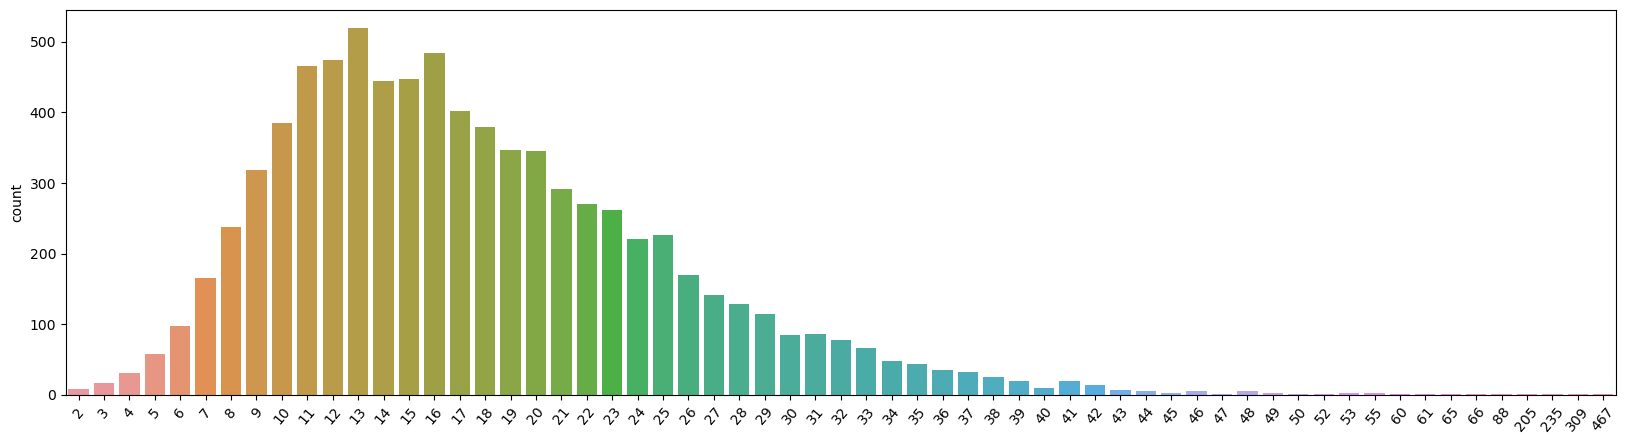

In [31]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [32]:
# remove statements longer than 96 words for CT-BERT
len(train_df)

6472

In [33]:
for i in range(len(train_df)):
    row = train_df.loc[i]
    if len(row.statement.split()) > 95:
        train_df = train_df.drop(i)

In [34]:
len(train_df)

6469

In [35]:
len(val_df)

1589

In [36]:
for i in range(len(val_df)):
    row = val_df.loc[i]
    if len(row.statement.split()) > 95:
        val_df = val_df.drop(i)

In [37]:
len(val_df)

1588

In [38]:
df = pd.concat([train_df, val_df])

# inspect length of news
titles = [text for text in df.statement]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 8057
Max length of the titles: 88
Mean length of the titles: 17.570435646022094


In [39]:
# purify and shuffle the DataFrames
from sklearn.utils import shuffle

# purify
train_df = train_df.iloc[:, [1,2]]
val_df = val_df.iloc[:, [1,2]]

# shuffle
train_df = shuffle(train_df).reset_index(drop=True)
val_df = shuffle(val_df).reset_index(drop=True)

In [42]:
# DataFrame to csv
train_df = train_df
val_df = val_df

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)

trainset size: (6469, 2)
valset size: (1588, 2)
